In [3]:
using PyPlot

In [4]:
function MakeHexagon(Nx::Int)
      Npara=Nx^2;
      N=Npara*3;

      unit=transpose([cos(pi/6),sin(pi/6)])
      a=transpose([2*cos(π/6),0]);
      b=[cos(π/6),1+sin(π/6)];
      bM=transpose(repeat(b,outer=[1,Nx]))
      rotmat=[[cos(2*π/3) -sin(2*π/3)]
            [sin(2*π/3) cos(2*π/3)]]


      Xb=Array{Float64}(N,2);
      Xw=Array{Float64}(N,2);

      ## Creating the positions in the first parallelogram
      for i in 1:Nx
        Xb[i,:]=(i-1)*a;
        Xw[i,:]=unit+(i-1)*a;
      end

      for j in 2:Nx
        Xb[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xb[1:Nx,:]+(j-1)*bM;
        Xw[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xw[1:Nx,:]+(j-1)*bM;
      end

      subt=Xb[Npara,2]+1
      Xb[1:Npara,1]=Xb[1:Npara,1]-(Nx-1)*b[1];
      Xw[1:Npara,1]=Xw[1:Npara,1]-(Nx-1)*b[1];
      Xb[1:Npara,2]=Xb[1:Npara,2]-subt;
      Xw[1:Npara,2]=Xw[1:Npara,2]-subt;

      Xb[Npara+(1:Npara),1]=rotmat[1,1]*Xb[1:Npara,1]+rotmat[1,2]*Xb[1:Npara,2];
      Xw[Npara+(1:Npara),1]=rotmat[1,1]*Xw[1:Npara,1]+rotmat[1,2]*Xw[1:Npara,2];
      Xb[Npara+(1:Npara),2]=rotmat[2,1]*Xb[1:Npara,1]+rotmat[2,2]*Xb[1:Npara,2];
      Xw[Npara+(1:Npara),2]=rotmat[2,1]*Xw[1:Npara,1]+rotmat[2,2]*Xw[1:Npara,2];

      Xb[2*Npara+(1:Npara),1]=rotmat[1,1]*Xb[Npara+(1:Npara),1]+rotmat[1,2]*Xb[Npara+(1:Npara),2];
      Xw[2*Npara+(1:Npara),1]=rotmat[1,1]*Xw[Npara+(1:Npara),1]+rotmat[1,2]*Xw[Npara+(1:Npara),2];
      Xb[2*Npara+(1:Npara),2]=rotmat[2,1]*Xb[Npara+(1:Npara),1]+rotmat[2,2]*Xb[Npara+(1:Npara),2];
      Xw[2*Npara+(1:Npara),2]=rotmat[2,1]*Xw[Npara+(1:Npara),1]+rotmat[2,2]*Xw[Npara+(1:Npara),2];

      vb=sortperm(Xb[:,1]+Npara*Xb[:,2])
      vw=sortperm(Xw[:,1]+Npara*Xw[:,2])
      Xb=Xb[vb,:];
      Xw=Xw[vw,:];

  return Xb, Xw
end

function MakeBonds(Nx::Int,Xb::Array{Float64,2},Xw::Array{Float64,2})
  Npara=Nx^2;
  N=Npara*3;

  nrowb=[collect(Nx:(2*Nx));collect((2*Nx-1):-1:(Nx+1))]
  nroww=flipdim(nrowb,1)

  i0b=ones(nrowb)
  i0w=ones(nroww)
  for i in 2:length(nrowb)
      i0b[i]=i0b[i-1]+nrowb[i-1]
      i0w[i]=i0w[i-1]+nroww[i-1]
  end
  push!(i0b,N+1);
  push!(i0w,N+1);

  offsetb=zeros(N+1)
  offsetw=zeros(N+1)
  for i in 1:Nx
      offsetb[i0b[i]:i0b[i+1]]=i-1
      offsetb[i0b[i+Nx]:i0b[i+1+Nx]]=Nx-i
      offsetw[i0w[i]:i0w[i+1]]=i-1
      offsetw[i0w[i+Nx]:i0w[i+1+Nx]]=Nx-i
  end

  Bondsw=Array{Int64}(N,3);
  Bondsb=Array{Int64}(N,3);
  for i in 1:N
      Bondsb[i,2]=i+offsetb[i];
      Bondsw[i,2]=i-offsetw[i];
      Bondsb[i,1]=i+1+offsetb[i];
      Bondsw[i,1]=i-1-offsetw[i];
      Bondsb[i,3]=i-Nx;
      Bondsw[i,3]=i+Nx;
  end

  boundaryb=ones(Int64,N,3);
  boundaryw=ones(Int64,N,3);
  i=1
  while isapprox(Xb[1,2],Xb[i,2])
      Bondsb[i,3]=N-Nx+i
      boundaryb[i,3]=0
      Bondsw[N-Nx+i,3]=i
      boundaryw[N-Nx+i,3]=0
      #println(N-Nx+i,' ',i)
      i+=1
  end

  Bondsw[i0w[1:Nx],1]=i0b[Nx+1+(1:Nx)]-1;
  boundaryw[i0w[1:Nx],1]=0
  Bondsb[i0b[Nx+1+(1:Nx)]-1,1]=i0w[1:Nx];
  boundaryb[i0b[Nx+1+(1:Nx)]-1,1]=0

  Bondsw[i0w[1+(1:Nx)]-1,2]=i0b[Nx+(1:Nx)];
  boundaryw[i0w[1+(1:Nx)]-1,2]=0
  Bondsb[i0b[Nx+(1:Nx)],2]=i0w[1+(1:Nx)]-1;
  boundaryb[i0b[Nx+(1:Nx)],2]=0

  return Bondsb, Bondsw, boundaryb, boundaryw
end

MakeBonds (generic function with 1 method)

In [55]:
Nx=5;
N=3*Nx^2;
Xb,Xw=MakeHexagon(Nx);
Bondsb, Bondsw, boundaryb, boundaryw=MakeBonds(Nx,Xb,Xw);

In [62]:
trans1b=copy(Xb)
trans2b=copy(Xb)
trans3b=copy(Xb)
trans1w=copy(Xw)
trans2w=copy(Xw)
trans3w=copy(Xw)

trans1b[:,2]+=-Nx*3;
trans1w[:,2]+=-Nx*3;

trans2b[:,1]+=sqrt(3)*Nx*3/2;
trans2w[:,1]+=sqrt(3)*Nx*3/2;
trans2b[:,2]+=-Nx*3/2;
trans2w[:,2]+=-Nx*3/2;

trans3b[:,1]+=-sqrt(3)*Nx*3/2;
trans3w[:,1]+=-sqrt(3)*Nx*3/2;
trans3b[:,2]+=-Nx*3/2;
trans3w[:,2]+=-Nx*3/2;

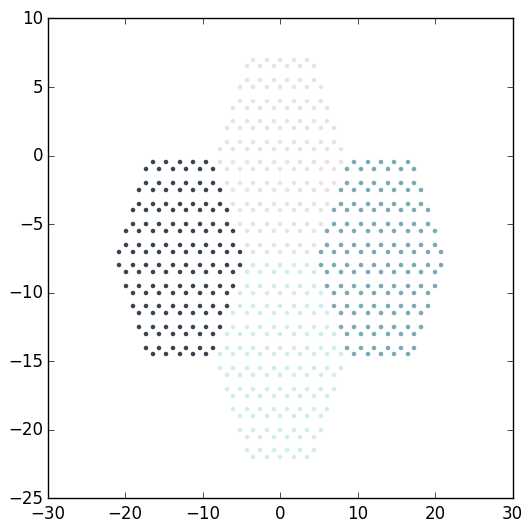

PyObject <matplotlib.collections.PathCollection object at 0x320ef9a90>

In [101]:
w, h = plt[:figaspect](1)
figure(figsize=(w,h))

scatter(Xb[:,1],Xb[:,2],color="#EDE0E1",marker=".")
scatter(Xw[:,1],Xw[:,2],color="#EDE0E1",marker=".")

scatter(trans1b[:,1],trans1b[:,2],color="#D0EDEA",marker=".")
scatter(trans1w[:,1],trans1w[:,2],color="#D0EDEA",marker=".")

scatter(trans2b[:,1],trans2b[:,2],color="#7AA8B6",marker=".")
scatter(trans2w[:,1],trans2w[:,2],color="#7AA8B6",marker=".")

scatter(trans3b[:,1],trans3b[:,2],color="#374350",marker=".")
scatter(trans3w[:,1],trans3w[:,2],color="#374350",marker=".")

In [95]:
function mindistb(i::Int,j::Int)
    dist(x,y)=sqrt(x^2+y^2);
    
    r0=dist(Xb[i,1]-Xb[j,1],Xb[i,2]-Xb[j,2]);
    r1=dist(trans1b[i,1]-Xb[j,1],trans1b[i,2]-Xb[j,2]);
    r2=dist(trans2b[i,1]-Xb[j,1],trans2b[i,2]-Xb[j,2]);
    r3=dist(trans3b[i,1]-Xb[j,1],trans3b[i,2]-Xb[j,2]);
    
    return minimum([r0,r1,r2,r3])
end

mindistb (generic function with 1 method)

In [69]:
N, N/2

(75,37.5)

In [99]:
j=1;
db=zeros(Float64,N);
for i in 1:N
    db[i]=mindistb(i,j);
end
db=db/maximum(db);

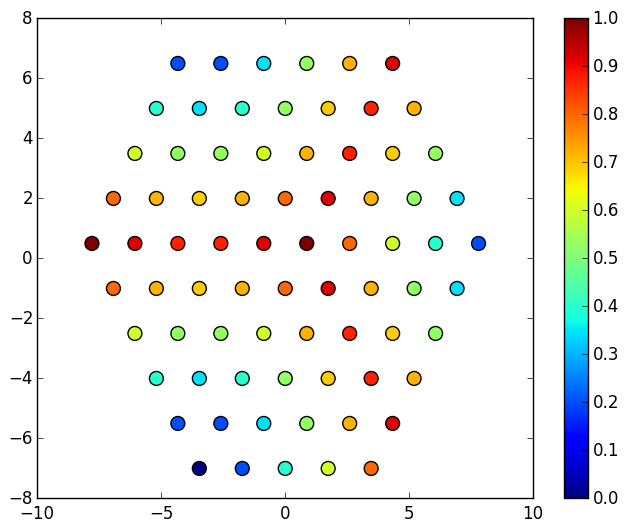

PyObject <matplotlib.colorbar.Colorbar instance at 0x320025b90>

In [100]:
scatter(Xb[:,1],Xb[:,2],c=db,marker="o",s=100)
colorbar()